# Evaluation of the TimeSeries class

In [1]:
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt


from nescience.timeseries import TimeSeries

In [2]:
def dummy_score(ts):
    mean = np.mean(ts)
    u = np.sum([(ts[i] - ts[i-1])**2 for i in range(0, len(ts)-1)])
    v = np.sum([(ts[i] - mean)**2 for i in range(0, len(ts)-1)])
    score = 1 - u/v
    return score

Load sample data: Mauna Loa Weekly Atmospheric CO2 Data

In [3]:
co2  = sm.datasets.co2.load_pandas()
data = co2.data.dropna(axis=0).values.flatten()

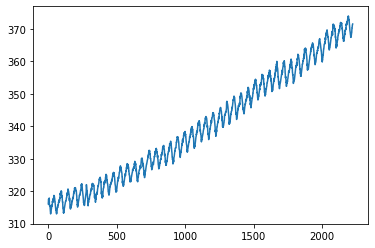

In [4]:
plt.plot(data)

### Miscoding

In [5]:
ts = TimeSeries()

In [6]:
ts.fit(data)

Auto-miscoding

In [7]:
mscd = ts.auto_miscoding()

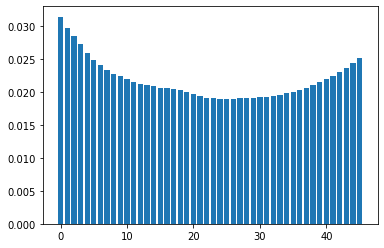

In [8]:
plt.bar(x=np.arange(len(mscd)), height=mscd)
plt.show()

Cross-miscoding

In [9]:
mdata = sm.datasets.macrodata.load_pandas().data

In [10]:
mdata = mdata.drop(["year", "quarter"], axis=1)

In [11]:
y = mdata["unemp"]
X = mdata.drop(["unemp"], axis=1)

In [12]:
ts = TimeSeries(multivariate=True)

In [13]:
ts.fit(y, X)

In [14]:
mscd = ts.cross_miscoding(0)

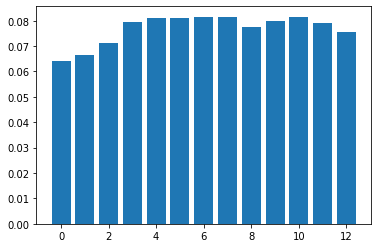

In [15]:
plt.bar(x=np.arange(len(mscd)), height=mscd)
plt.show()

## Linear model

In [16]:
data = [x + np.random.randn() for x in range(1, 100)]

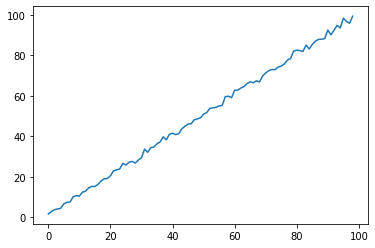

In [17]:
plt.plot(data)

In [18]:
dummy_score(data)

0.8738890328039806

In [19]:
model = TimeSeries()

In [20]:
model.fit(data)

In [21]:
model.auto_timeseries()

TimeSeries()

In [22]:
model.score(data)

0.9969098200740601

In [23]:
type(model.get_model())

sklearn.linear_model._base.LinearRegression

In [24]:
model.score(data)

0.9969098200740601

## Additive Model

In [25]:
import numpy as np

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [27]:
rcParams['figure.figsize'] = 10, 5

In [28]:
x = 1
data = [0] * 100
data[0] = 1
for i in range(1, 100):
   data[i] = data[i-1] + np.random.randn()

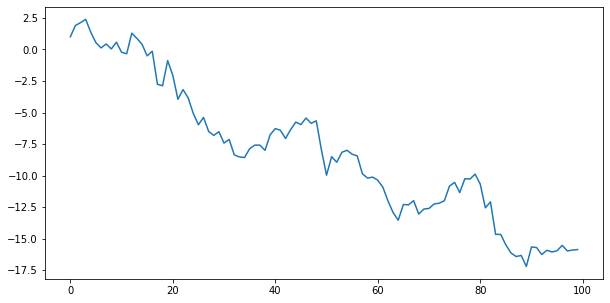

In [29]:
plt.plot(data)

In [30]:
dummy_score(data)

0.8764156906701894

In [32]:
model = TimeSeries()

In [33]:
model.fit(data)

In [34]:
model.auto_timeseries()

TimeSeries()

In [35]:
model.score(data)

0.9669292146643678

In [36]:
model.score(data)

0.9669292146643678

## Multiplicative Model

In [37]:
x = 1
data = [0] * 100
data[0] = 1
for i in range(1, 100):
   data[i] = data[i-1] * np.random.randn()

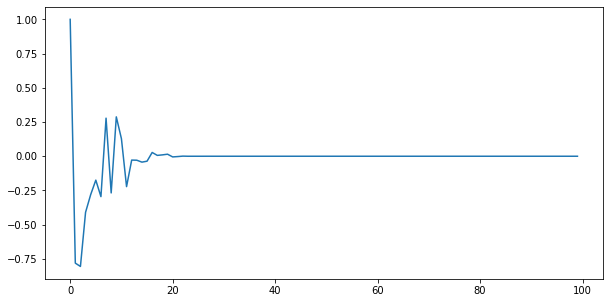

In [38]:
plt.plot(data)

In [39]:
dummy_score(data)

-0.8964950287838642

In [40]:
model = TimeSeries()

In [41]:
model.fit(data)

In [42]:
model.auto_timeseries()

TimeSeries()

In [43]:
model.score(data)

0.06396104538768888

In [44]:
model.score(data)

0.06396104538768888